In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from statsmodels.formula.api import ols

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Descriptive Statistics for the data and Visualisation

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


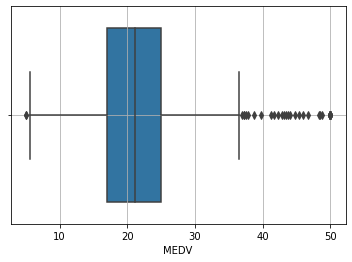

In [19]:
# boxplot for MEDV
sns.boxplot(data=boston_df, x='MEDV')
plt.grid()

[Text(0.5, 0, 'CHAS value'), Text(0, 0.5, 'Count')]

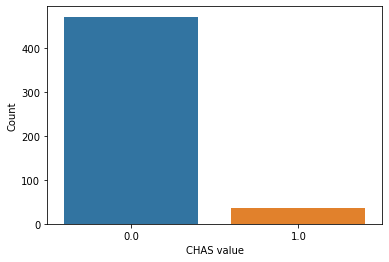

In [5]:
# bar plot for CHAS
fig1,ax1=plt.subplots()
ax1=sns.barplot(x=boston_df.CHAS.unique() ,y=boston_df.CHAS.value_counts())
ax1.set(xlabel='CHAS value',ylabel='Count')

<AxesSubplot:xlabel='AGE group', ylabel='MEDV'>

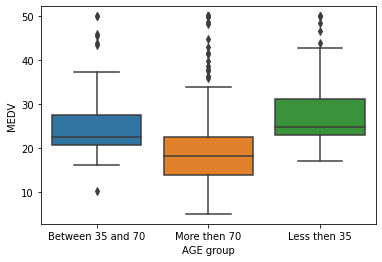

In [6]:
# boxplot for MEDV vs AGE (proportions in <=35, 35-70 and >=70)
boston_df.loc[(boston_df['AGE']<=35),'AGE group']='Less then 35'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'AGE group']='Between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70),'AGE group']='More then 70'

sns.boxplot(data=boston_df, x='AGE group', y='MEDV')

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

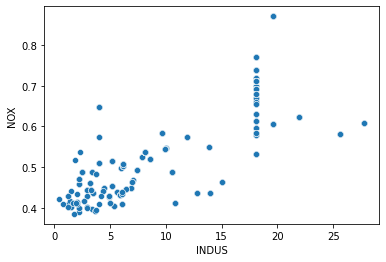

In [7]:
# scatter plt for NOX and INDUS
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

Text(0, 0.5, 'Number of observations')

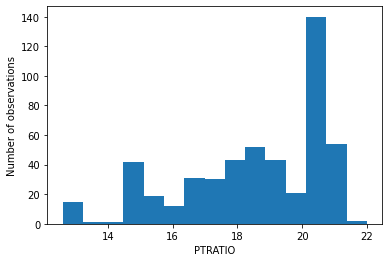

In [17]:
# histogram for PTRATIO
plt.hist(x=boston_df.PTRATIO, bins=15)
plt.xlabel('PTRATIO')
plt.ylabel('Number of observations')

# Task 5 : Tests

In [9]:
# 1. Null Hypothesis: There is no difference in the medain value of houses bounded by Charles River and not bounded
# running t-test
stat.ttest_ind(boston_df[boston_df.CHAS==0]['MEDV'],
               boston_df[boston_df.CHAS==1]['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [10]:
# 2. Null Hypothesis: There is no difference in the MEDV for each proportion of owner occupied units built prior to 1940 (AGE)
less_then_35 = boston_df[boston_df['AGE group'] == 'Less then 35']['MEDV']
between_35_70 = boston_df[boston_df['AGE group'] == 'Between 35 and 70']['MEDV']
more_then_70 = boston_df[boston_df['AGE group'] == 'More then 70']['MEDV']

f_statistic, p_value = stat.f_oneway(less_then_35, between_35_70, more_then_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [11]:
# 3. Null hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
stat.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

In [12]:
# 4. impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
lm = ols('MEDV ~ DIS', data = boston_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        07:23:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""